<h1>Python 2 Excel</h1>
<br>
This notebook illustrates some of the possiblities to export Python to Excel using the <b>openpyxl</b> package.

In [52]:
import numpy as np
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

From the <b>openpyxl</b> module, the following submodules are downloaded:

In [53]:
#simple workbook, worksheet operations
from openpyxl import Workbook , load_workbook

In [54]:
#to save impages into file
from openpyxl.drawing.image import Image

In [55]:
# to write pandas into Excel
from openpyxl.utils.dataframe import dataframe_to_rows

In [56]:
# to ad comments to your excel
from openpyxl.comments import Comment

In [57]:
# to add colors and font style
from openpyxl.styles import Font, Color, colors , PatternFill

In [58]:
#to add named styles and alignment
from openpyxl.styles import NamedStyle , Alignment

In [59]:
#for conditional formatting
from openpyxl.formatting.rule import ColorScaleRule, CellIsRule, FormulaRule, Rule
from openpyxl.styles.differential import DifferentialStyle

<h3>Creating sheets & notebooks </h3><br>
The workbook does not need to be created in the filesystem. It is just an object in memory

In [60]:
# Create the workbook
wb = Workbook()
# Get the active worksheet of the workbook
ws = wb.active


In [61]:
# create a sheet with a particular name
ws1 = wb.create_sheet("Seminar")
# It is position the new sheet at a particular place (for example at the beginning).
# This corresponds to index = 0
ws2 = wb.create_sheet("Calculations",index=0)


In [62]:
# The Sheets are stored as dictionaries in the computer, it is very easy to acces them"
ws = wb["Seminar"]
print(ws.title)

Seminar


<h3>Adding data to the sheet </h3><br>
The lowest element in the hierarchy is a cell:
<br>
Workbook->Worksheet->Cell
<h3>Cells</h3>
Reading and writing a particul cell of a worksheet

In [63]:
# Writing Data
ws['A4'] = 138.0

# Reading data takes place via the attributes of the cell object:
c = ws['A4'].value
print(c)

138.0


In [64]:
# Other properties
print(ws['A4'].font.name)
print(ws['A4'].font.sz)

Calibri
11.0


In [65]:
# Get access to a cell using RC-method
# Setting the cell to a particular value
ws.cell(row=2,column=4,value=123)

# Reading the content of the cell
print(ws.cell(row=2,column=4).value)

123


When a worksheet is created in memory, it contains no cells. A cell object is created when it is first accessed.So when you loop over cells that do not exist, they are actualy going to be created.<br>
<p> for i in range(1,101):<br>
...        for j in range(1,101):<br>
...            ws.cell(row=i, column=j)</p><br>
<br>
will create a 100 x 100 array on the sheet

<h3>Ranges</h3>
Accessing many cells

In [66]:
# range A1 to C2
cell_range = ws['A1':'C2']

# columns C to D
ws['C:D']

# row 5 to 6
ws[5:6];


Looping over a range can be done, looping over the cols via the iter_cols method and
then one has to loop over each cell in the col object.

In [67]:
i=0
for col in ws.iter_cols(min_row=4,min_col=2, max_col=3, max_row=6):
    for cell in col:
        cell.value= i
        i+=1

<h2>Saving to a file</h2>
If the file exists, it will be overwritten without warning

In [68]:
filename = 'test.xlsx'
wb.save(filename=filename)

<h2>Reading the file</h2><br>
openpyxl does currently not read all possible items in an Excel file so images and charts will be lost from existing files if they are opened and saved with the same name.

In [69]:
# Reading the sheet names in the book
wb2 = load_workbook('test.xlsx')
print(wb2.get_sheet_names())

['Calculations', 'Sheet', 'Seminar']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
# check if file exists
filename = 'test.xlsx'
if os.path.isfile(filename):
   wb = load_workbook(filename)
else:
    wb = Workbook()

<h3>Number formats</h3>

In [71]:
ws = wb.active
ws['A1'] = datetime.datetime(2010, 7, 21)
ws['A1'].number_format='yyyymmdd'
ws['A2'] = 13/100
ws['A2'].number_format = '0.0%'

In [72]:
print(ws['A1'].value)

2010-07-21 00:00:00


<h3>Merge / Unmerge cells</h3>

In [73]:
ws.merge_cells('A3:D3')
# or equivalently
ws.merge_cells(start_row=5,start_column=1,end_row=5,end_column=4)
ws.cell(row=5,column=1,value=4)
ws.cell(row=5,column=1).alignment = Alignment(horizontal="center")
wb.save('test.xlsx')

<h3>Adding Image into Spreadsheet</h3>

/anaconda3/lib/python3.6/site-packages/openpyxl/worksheet/worksheet.py:695: DeprecationWarning: Call to deprecated function anchor (Anchors can be passed in when an image is added to a worksheet).
  img.anchor(cell, anchortype="oneCell")


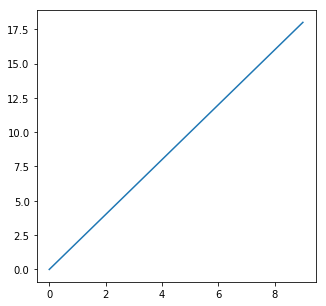

In [74]:
#create figure
fig,ax = plt.subplots(1,1,figsize=(5,5))
x = np.arange(0,10,1)
y = 2*np.arange(0,10,1)
ax.plot(x ,y)

# save figure
fig.savefig('myfig.png')

# Embedding into sheet
img = Image('myfig.png')
ws_fig = wb.create_sheet('Figure')
ws_fig.add_image(img, 'A1')
wb.save(filename='test.xlsx')

<h3>Working with Pandas Dataframes</h3>
<br>
 Pandas has a build in function to export to Excel : <b>ExcelWriter</b>. With openpyxl, there are alternative approaches to export data to Excel:

In [75]:
x = np.random.randn(5,10)
df = pd.DataFrame(x)
ws = wb.create_sheet('Pandas')
for r in dataframe_to_rows(df, index=True, header=True):
    ws.append(r)

#These lines gives a pandas "look-and-feel"
for cell in ws['A'] + ws[1]:
    cell.style = 'Pandas'
wb.save('test.xlsx')

<h3>Formatting the cells with colors and fonttypes</h3>

In [76]:
# create diffenrent fonts
ft = Font(color=colors.RED)
ft_italic = Font(color=colors.RED,italic=True)
ft_bold = Font(name='Arial',color=colors.BLUE,bold=True)

In [77]:
ws['A1'].font = ft
ws['A2'].font = ft_italic
ws['A3'].font = ft_bold
wb.save('test.xlsx')

<h2>Named Styles</h2>

In [78]:
highlight = NamedStyle(name="highlight")
highlight.font = Font(bold=True, size=20,color=colors.BLUE)
wb.add_named_style(highlight)

In [79]:
ws['A1'].style = highlight
ws['B2'].style = 'Calculation'
wb.save('test.xlsx')

There are some pre-defined styles

In [80]:
try:
    ws = wb['Info']
except:
    ws = wb.create_sheet('Info')

In [81]:
# Informative
ws['A1']='Calculation'
ws['A1'].style = 'Calculation'
ws['A2']='Total'
ws['A2'].style='Total'
ws['A3']='Note'
ws['A3'].style='Note'
ws['A4']='Warning Text'
ws['A4'].style='Warning Text'
ws['A5']='Explanatory Text'
ws['A5'].style='Explanatory Text'

# TextStyles
ws['A6']='Title'
ws['A6'].style='Title'
ws['A7']='Headline 1'
ws['A7'].style='Headline 1'
ws['A7']='Headline 2'
ws['A8'].style='Headline 3'
ws['A8']='Headline 3'
ws['A9']='Headline 4'
ws['A9'].style='Headline 4'
ws['A10']='Hyperlink'
ws['A10'].style='Hyperlink'
ws['A11']='Followed Hyperlink'
ws['A11'].style='Followed Hyperlink'
ws['A12']='Linked Cell'
ws['A12'].style='Linked Cell'

#Comparisons
ws['A13']='Input'
ws['A13'].style='Input'
ws['A14']='Output'
ws['A14'].style='Output'
ws['A15']='Check Cell'
ws['A15'].style='Check Cell'
ws['A16']='Good'
ws['A16'].style='Good'
ws['A17']='Bad'
ws['A17'].style='Bad'
ws['A18']='Neutral'
ws['A18'].style='Neutral'

#Accents

ws['A19']='20 % - Accent1'
ws['A19'].style='20 % - Accent1'
ws['A20']='40 % - Accent1'
ws['A20'].style='40 % - Accent1'
ws['A21']='60 % - Accent1'
ws['A21'].style='60 % - Accent1'
ws['A22']='Accent2'
ws['A22'].style='Accent2'
ws['A23']='20 % - Accent2'
ws['A23'].style='20 % - Accent2'
ws['A24']='40 % - Accent2'
ws['A24'].style='40 % - Accent2'
ws['A25']='60 % - Accent2'
ws['A25'].style='60 % - Accent2'
ws['A26']='Accent3'
ws['A26'].style='Accent3'
ws['A27']='20 % - Accent3'
ws['A27'].style='20 % - Accent3'
ws['A28']='40 % - Accent3'
ws['A28'].style='40 % - Accent3'
ws['A29']='60 % - Accent3'
ws['A29'].style='60 % - Accent3'
ws['A30']='Accent4'
ws['A30'].style='Accent4'
ws['A31']='20 % - Accent4'
ws['A31'].style='20 % - Accent4'
ws['A32']='40 % - Accent4'
ws['A32'].style='40 % - Accent4'
ws['A33']='60 % - Accent4'
ws['A33'].style='60 % - Accent4'
ws['A34']='Accent5'
ws['A34'].style='Accent5'
ws['A35']='20 % - Accent5'
ws['A35'].style='20 % - Accent5'
ws['A36']='40 % - Accent5'
ws['A36'].style='40 % - Accent5'
ws['A37']='60 % - Accent5'
ws['A37'].style='60 % - Accent5'
ws['A38']='Accent6'
ws['A38'].style='Accent6'
ws['A39']='20 % - Accent6'
ws['A39'].style='20 % - Accent6'
ws['A40']='40 % - Accent6'
ws['A40'].style='40 % - Accent6'
ws['A41']='60 % - Accent6'
ws['A41'].style='60 % - Accent6'
ws['A42']='Pandas'
ws['A42'].style='Pandas'

In [82]:
wb.save('test.xlsx')

<h3>Conditional Formatting </h3>
<br>
Create random numbers in the document on cell A1:A10 and fill the cell when the value is less than 0.5

In [83]:
try:
    ws = wb['format']
except:
    ws = wb.create_sheet('format')

for col in ws.iter_cols(min_row=1,min_col=1, max_col=1, max_row=11):
    for cell in col:
        cell.value= np.random.rand(1)[0]
        

redFill = PatternFill(start_color='EE1111',end_color='EE1111',fill_type='solid')
ws.conditional_formatting.add('A2:A10',CellIsRule(operator='lessThan', formula=['0.5'], stopIfTrue=True, fill=redFill))

wb.save('test.xlsx')